# This is heart disease prediction project

    we are going to predict based on the data weather someone have heart disease or not
    1- problem defination
    2- Data
    3- Evalution
    4- Features
    5- Modeling
    6- Experimentation



# 1-Problem Defination
    
    > Based on the data we have to predict if a patience have heart disease or not


# 2-Data

    >we have the data and loaded it already

# 3-Evalue
    > in initial stages we have to make sure, if our model gives us the accuracy of 90%


# 4-Features 
    Which features are important and which features means what


# Tools preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#Importing Evaution Liberies 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Exploring the Data Initial Stage
    1- What problem I am going to solve
    2- What kind of data I have
    3- Does this  data having missing values
    4- Are there any outliers, sporious vectors
    5- Can we add and remove some of the features 

In [2]:
heart = pd.read_csv('heart.csv')
heart.shape

(303, 14)

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

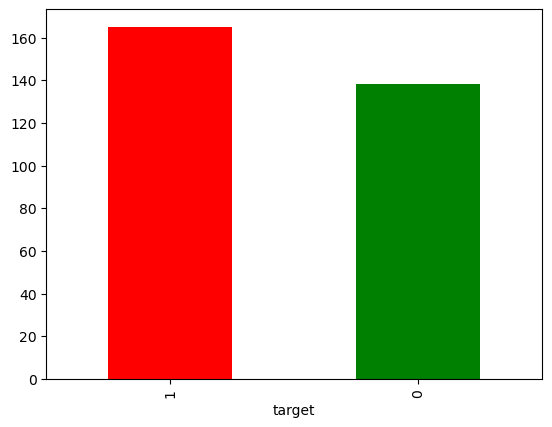

In [6]:
heart['target'].value_counts().plot(kind='bar', color= ['red', 'green'])

In [7]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(heart.sex,heart.target)

target,0,1
sex,,
0,24,72
1,114,93


In [12]:
72/96 , 93/207

(0.75, 0.4492753623188406)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

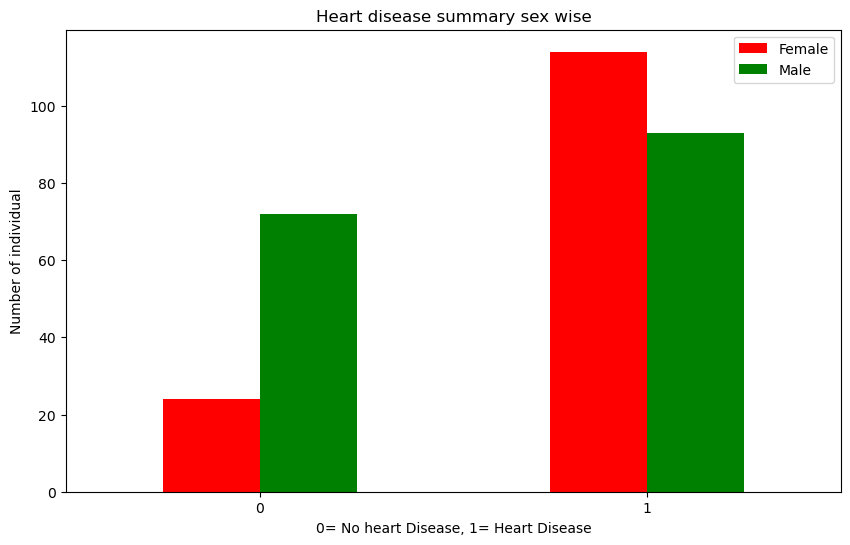

In [13]:
pd.crosstab(heart.sex, heart.target).plot(kind= 'bar', 
                                         figsize=(10,6),
                                         color=['red','green'])

plt.title('Heart disease summary sex wise')
plt.xlabel('0= No heart Disease, 1= Heart Disease')
plt.ylabel('Number of individual')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

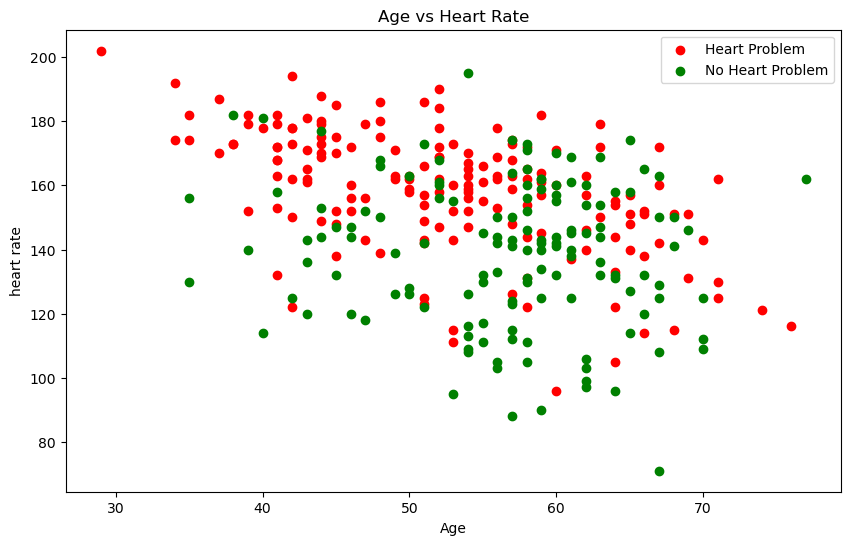

In [14]:
#Finding pattern in Data using scatter plot
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(heart.age[heart.target==1], heart.thalach[heart.target==1], color = 'red')
plt.scatter(heart.age[heart.target==0], heart.thalach[heart.target==0], color = 'green')

plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('heart rate')
plt.legend(['Heart Problem', 'No Heart Problem' ]);
#we can see that heart rate dicreases of those who have heart disease by the age.
#while those who have not heart disease gave not specific pattern

In [15]:
#create Histogram to see age distribution


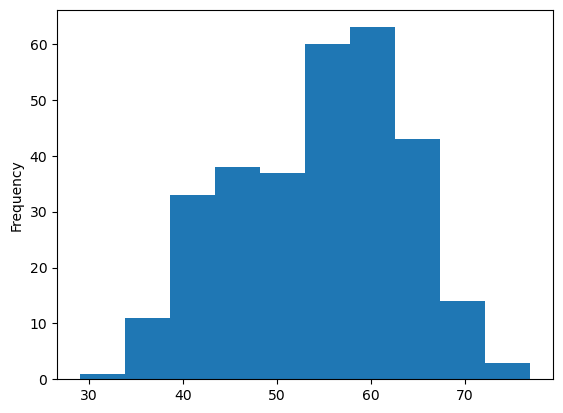

In [16]:
heart.age.plot.hist(); #Gausian Distribution 
#values are squed to higher age value. it is showing that it is more in high age people
#it tells us how many outliers in your data.

In [17]:
heart.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

cp: chest pain type

    -- Value 0: typical angina : chest pain due to decrease blood pressure
    -- Value 1: atypical angina : chest pain not related to heart
    -- Value 2: non-anginal pain : Not pain related to heart
    -- Value 3: asymptomatic : chest pain not showing heart problem

In [18]:
pd.crosstab(heart.cp, heart.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


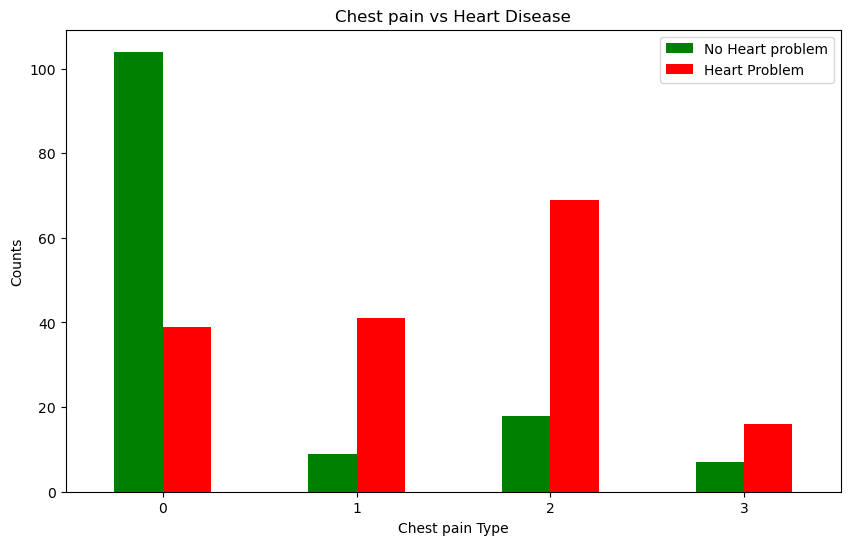

In [19]:
#Make the bar chart of Chest pain vs Target
pd.crosstab(heart.cp, heart.target).plot(kind  = 'bar', 
                                         figsize=(10,6),
                                         color = ['green', 'red']
                                        )
#Make some description of the Chart 
plt.title('Chest pain vs Heart Disease')
plt.xlabel('Chest pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart problem', 'Heart Problem'])
plt.xticks(rotation=0);

# Correlation Matrix 

In [20]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
heart.corr()
#posative corelation : if one value willincrease other will also increase
#Negative Corelation : if one value willincrease other will decrease 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


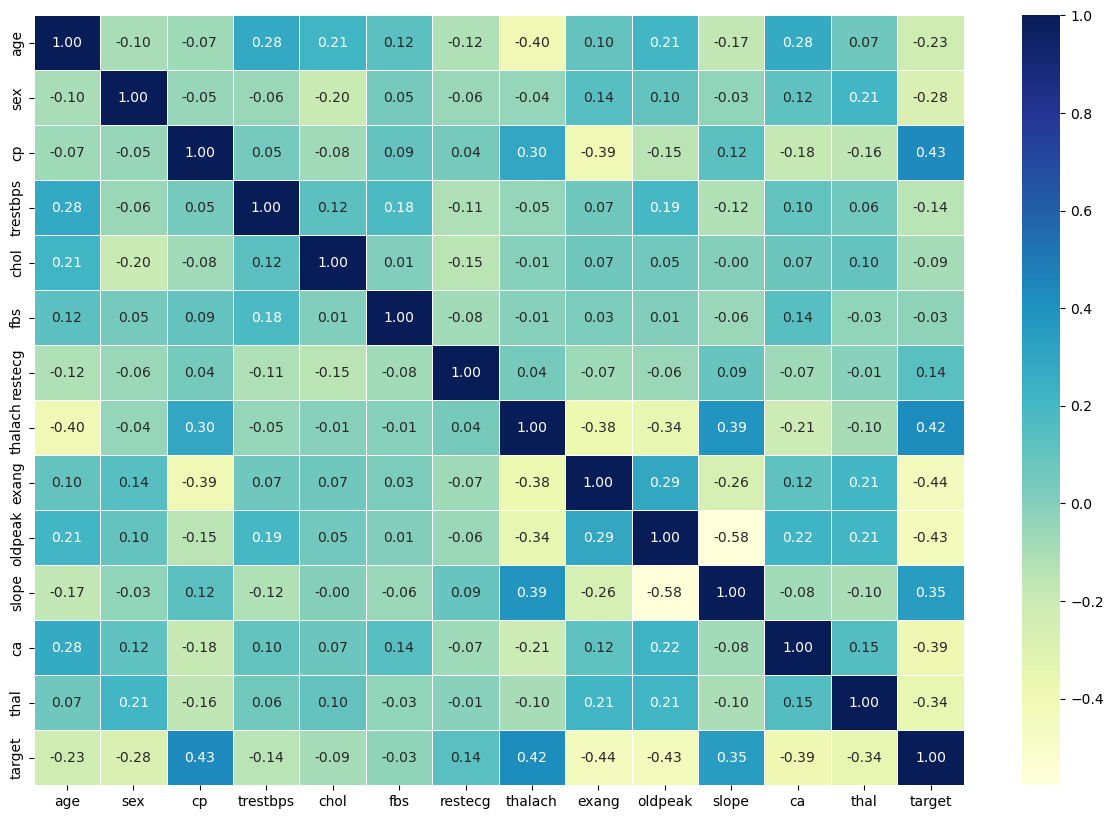

In [22]:
cor_map= heart.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax= sns.heatmap(cor_map,
               annot= True,
               linewidths= 0.5,
               fmt = '0.2f',
               cmap='YlGnBu');

In [23]:
#split data to train and test
x = heart.drop('target', axis=1)
y= heart['target']
#use seed so that other can produce the same result
np.random.seed(7)
#split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.20)


In [24]:
len(x) , len(x_train), len(x_train)/len(x)

(303, 242, 0.7986798679867987)

# The models we are goiong to use
    1- K Nearest Neighbors Classifer
    2- Random Forest Classifer
    3- logistic Regression 

In [25]:
#Putitng the models into the Disctionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier(),
         'Logistic Regression'  : LogisticRegression()}

#Create function to evalute the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(7)
    #make the dictionary to score the model
    model_score= {}
    #looping through
    for name,model in models.items():
        model.fit(x_train, y_train)
        #Evalute the model
        model_score[name] = model.score(x_test, y_test)
    return model_score
    

In [26]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train= y_train,
                            y_test = y_test)
model_scores

C:\Users\Usama Zafar\Desktop\AI_Course\cardio_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7540983606557377}

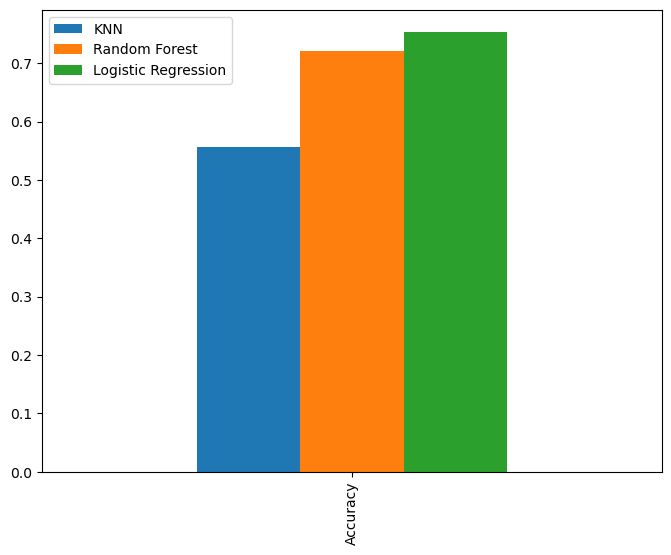

In [27]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.plot(kind= 'bar', figsize=(8,6)) ;

# improving and tuning the model

Universal methods used for all classification problems

    1 hyperparameter Tuning
    2 Features Improving

Advance Level

    1 confusion Matrix
    2 Cross Validation
    3 Precision
    4 recall
    5 f1
    6 classification report
    7 roc curve


In [28]:
train_score = []
test_score = []
#create range to be test for n_neighbours
nneighbors = range(1,30)
#KNN instance
KNN = KNeighborsClassifier()
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    #Run  the fit for ith values
    KNN.fit(x_train, y_train)
    #update the training score
    train_score.append(KNN.score(x_train, y_train))
    #update the test score
    test_score.append(KNN.score(x_test, y_test))



In [29]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [30]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot Accuracy score

Max KNN Score : 70.49%


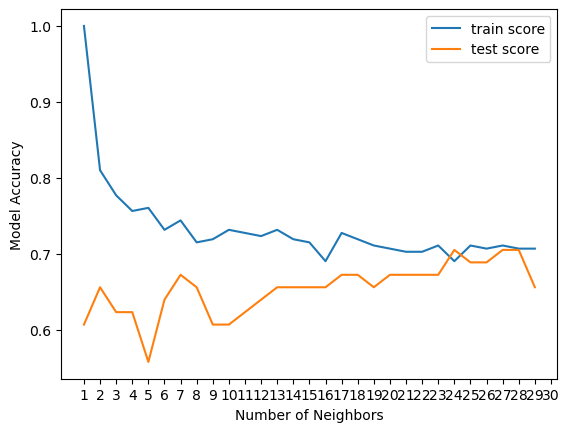

In [31]:
plt.plot(nneighbors, train_score, label ='train score' )
plt.plot(nneighbors, test_score, label = 'test score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Max KNN Score : {max(test_score)*100:0.2f}%")
#KNN does not gives required accuracy

# Hyperparameters Tuning using Randomized Search CV

    . LogesticRegression
    . RandomForestClassifier

In [32]:
LR_Hp= {
    'C' : np.logspace(-4,4,20),
    'solver' : ['liblinear']
}
RFC_Hp ={
    'n_estimators' : np.arange(10,1600,100),
    'max_depth': [None, 3,5,6,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf' :np.arange(1,20,2)
        }

In [33]:
#Tune Logistic Regression
np.random.seed(7)
#lets use RSCV to tune HP
LR = RandomizedSearchCV(LogisticRegression(),
                       param_distributions = LR_Hp,
                       cv = 5,
                       n_iter =20,
                       verbose = True)
#fit the random HP search model for LR
LR.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
LR.score(x_test,y_test)

0.7540983606557377

In [35]:
LR.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [36]:
#Tune Random Forest Clasiisfier
np.random.seed(7)
#lets use RSCV to tune HP
RFC = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = RFC_Hp,
                       cv = 5,
                       n_iter =20,
                       verbose = True)
#fit the random HP search model for LR
RFC.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [37]:
RFC.score(x_test, y_test)

0.7049180327868853

In [38]:
RFC.best_params_


{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

{'KNN': 0.5573770491803278, we have already removed it

 'Random Forest': 0.7213114754098361, Aftr HP tuning = 0.7049180327868853
 
 'Logistic Regression': 0.7540983606557377}, After HP Tuning = 0.7540983606557377

1- By hand HP Tuning # Done it been there, seen it all
2- RandomizedSearchCV # Done it been there, seen it all
3- GridSearchCV #lets try this one

# Hyperparameter tuning uning GridSearch CV

In [40]:
#Tune Logistic Regression
np.random.seed(7)
#lets use RSCV to tune HP
LR_gs = GridSearchCV(LogisticRegression(),
                       param_grid = LR_Hp,
                       cv = 5,
                       verbose = True)
#fit the random HP search model for LR
LR_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
LR_gs.score(x_test, y_test)

0.7540983606557377

In [42]:
LR_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [45]:
#Tune RandomForestClassifier 
RFC2_Hp ={
    'n_estimators' : np.arange(1,101,50),
    'max_depth': [None, 3,50],
    'min_samples_split': np.arange(2,8,2),
    'min_samples_leaf' :np.arange(1,7,2)
        }
np.random.seed(7)
#lets use RSCV to tune HP
RFC_gs = GridSearchCV(RandomForestClassifier(),
                       param_grid = RFC2_Hp,
                       cv = 5,
                       verbose = True)
#fit the random HP search model for LR
RFC_gs.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [46]:
RFC_gs.score(x_test, y_test)

0.7377049180327869

    'KNN': 0.5573770491803278, after improving 0.7049

    'Random Forest': 0.7213114754098361, Aftr HP tuning = 0.7377049180327869

    'Logistic Regression': 0.7540983606557377}, After HP Tuning = 0.7540983606557377

# Improving and Tuning Model

Universal Method used for all classification Problems

    Hyperparameter Tuning
    Features Tuning
Advance Leval

    Confusion Matrix
    Cross_validation
    Precision
    Recall
    f1
    Classification report
    Roc Curve


In [88]:
#ploting area under the curve
y_proba=RFC_gs.predict_proba(x_test)
y_prob_posative = y_proba[:, 1]
y_prob_posative 

array([0.97993903, 0.75074697, 0.42827293, 0.76373327, 0.93082081,
       0.62219349, 0.87084571, 0.16041154, 0.61622076, 0.58418145,
       0.89747121, 0.02973856, 0.60829443, 0.96943483, 0.10210084,
       0.27529284, 0.90091815, 0.96601307, 0.13529412, 0.84450486,
       0.33997821, 0.86430367, 0.19453598, 0.02290902, 0.98091943,
       0.0797619 , 0.42953626, 0.74905804, 0.81066038, 0.98039216,
       0.96124156, 0.89763278, 0.97843137, 0.16799437, 0.93467235,
       0.97601747, 0.93675509, 0.62594286, 0.84151061, 0.48597106,
       0.01316527, 0.52450458, 0.72639066, 0.51957809, 0.27188481,
       0.34019608, 0.14604372, 0.14463119, 0.81794513, 0.9392942 ,
       0.79167445, 0.33507342, 0.62257775, 0.5844774 , 0.27429972,
       0.79671363, 0.76915967, 0.37300809, 0.02924837, 0.52563025,
       0.89147454])

In [89]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_posative )

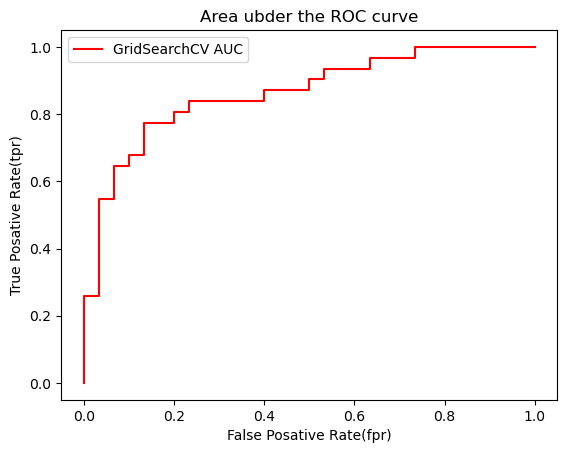

In [90]:
#create a function for ploting using matplotlib
import matplotlib.pyplot as plt
def plot_roc(fpr,tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color = 'red', label= "GridSearchCV AUC")
    #customiztion
    plt.title('Area ubder the ROC curve')
    plt.xlabel('False Posative Rate(fpr)')
    plt.ylabel('True Posative Rate(tpr)')
    plt.legend()
    plt.show()

plot_roc(fpr, tpr)

In [104]:
#confusion matrix
y_preds = RFC_gs.predict(x_test)
con_Mat = confusion_matrix(y_test, y_preds)
con_Mat

array([[18, 12],
       [ 4, 27]], dtype=int64)

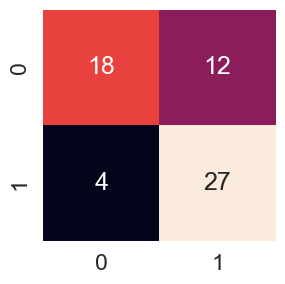

In [105]:
sns.set(font_scale= 1.5)
def plot_confusion(y_test, y_preds):
    '''This will plot the confusion matrix'''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(con_Mat,
                    annot = True,
                    cbar = False)
plot_confusion(y_test, y_preds)

# Lest plot the calssification report 

In [106]:
print(classification_report(y_test, y_preds)) #we have to increase the f1 score

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [111]:
LR_gs.best_params_
lr = LogisticRegression(C = 0.615848211066026,
                        solver = 'liblinear' )

In [115]:
#cross validated Accuracy
cv_accuracy = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring = 'accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [117]:
#cross validated precision
cv_precision = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8108267922553637

In [118]:
#cross validated recall
cv_recall = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.89648033126294

In [119]:
#cross validated f1
cv_f1= cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508447334977947

# Visualization the Crross Validated Matrices

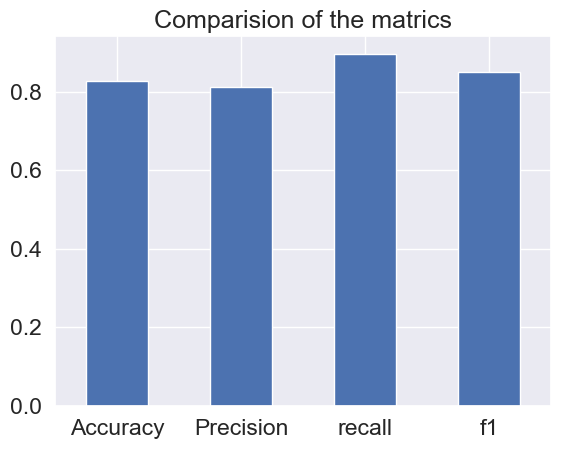

In [129]:
cv_plot= pd.DataFrame({
    'Accuracy' : cv_accuracy,
    'Precision': cv_precision,
    'recall' : cv_recall,
    'f1': cv_f1
}, index =[0])
cv_plot.T.plot.bar(title='Comparision of the matrics',
                 legend = False)
plt.xticks(rotation=0);

# Features Improvement


In [130]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [131]:
#chose cofficiebt
lr.fit(x_train, y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [134]:
lr.coef_ #Cofficient Matrix tell us how all are related to target

array([[ 0.02258519, -1.36424618,  0.79069618, -0.02407434, -0.00186723,
         0.46020094,  0.40737683,  0.03558889, -0.78274542, -0.56757494,
         0.52792825, -0.64610992, -1.10640019]])

In [136]:
final_coef = dict(zip(heart.columns, list(lr.coef_[0])))
final_coef

{'age': 0.02258518664970554,
 'sex': -1.3642461816765101,
 'cp': 0.7906961820556367,
 'trestbps': -0.024074344050095283,
 'chol': -0.0018672296463649782,
 'fbs': 0.4602009443093141,
 'restecg': 0.4073768321684957,
 'thalach': 0.035588889531912235,
 'exang': -0.78274542034898,
 'oldpeak': -0.5675749432335981,
 'slope': 0.5279282517877898,
 'ca': -0.6461099217862547,
 'thal': -1.1064001887853232}

<Axes: title={'center': 'Features Importance'}>

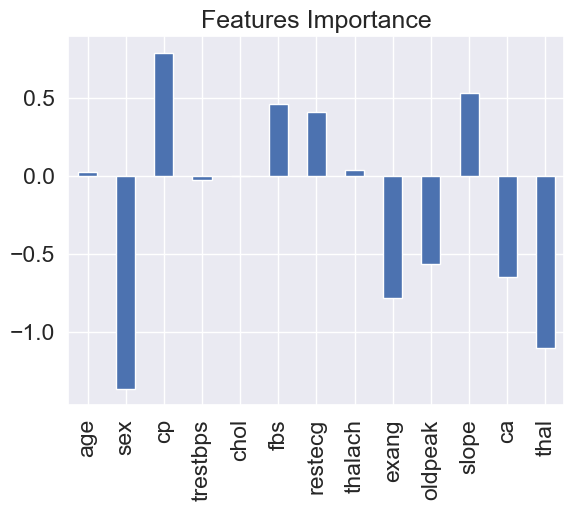

In [137]:
features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title=  'Features Importance', legend= False)

# Conclusion

#we set 95% accuracy goal but we did not meat

we can ask few question

    1-what we try to get more data
    2- What if wetry to improve the quality of data
    3- What if we try to use another model and see if there is an improvement